In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
df1 = pd.read_excel('前十月data.xlsx')
df1['DATE'] = pd.to_datetime(df1['DATE'])
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df1)

          DATE   ULSP:  Pump price (p/litre)  Duty rate   VAT    OPEC   \
0   2013-01-07                    131.860715       45.82  17.5  108.15   
1   2013-01-14                    132.000415       45.82  17.5  108.06   
2   2013-01-21                    132.213910       45.82  17.5  109.32   
3   2013-01-28                    132.949500       45.82  17.5  110.15   
4   2013-02-04                    134.380516       45.82  17.5  112.99   
5   2013-02-11                    135.560969       45.82  17.5  114.36   
6   2013-02-18                    136.858936       45.82  17.5  114.18   
7   2013-02-25                    138.496624       45.82  17.5  111.20   
8   2013-03-04                    139.473306       45.82  17.5  106.12   
9   2013-03-11                    139.997313       45.82  17.5  106.96   
10  2013-03-18                    137.582644       45.82  17.5  106.36   
11  2013-03-25                    137.085944       45.82  17.5  105.48   
12  2013-04-01                    137.

In [4]:
df2= pd.read_excel('后两月data.xlsx')
df2['DATE'] = pd.to_datetime(df2['DATE'])
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df2)

         DATE   ULSP:  Pump price (p/litre)  Duty rate   VAT    OPEC   \
0  2013-11-04                    129.921945       47.10  17.5  104.22   
1  2013-11-11                    129.705026       47.10  17.5  103.39   
2  2013-11-18                    129.887998       47.10  17.5  105.04   
3  2013-11-25                    130.033404       47.10  17.5  106.07   
4  2013-12-02                    130.253998       47.10  17.5  106.74   
5  2013-12-09                    130.764371       47.10  17.5  107.72   
6  2013-12-16                    130.960742       47.10  17.5  106.92   
7  2013-12-23                    130.051881       47.10  17.5  108.73   
8  2013-12-30                    130.033945       47.10  17.5  108.57   
9  2014-11-03                    123.938787       47.10  17.5   80.64   
10 2014-11-10                    122.942930       47.10  17.5   78.98   
11 2014-11-17                    122.501378       47.10  17.5   73.90   
12 2014-11-24                    122.294582       4

In [5]:
merged_df = pd.concat([df1, df2], ignore_index=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(merged_df)

          DATE   ULSP:  Pump price (p/litre)  Duty rate   VAT    OPEC   \
0   2013-01-07                    131.860715       45.82  17.5  108.15   
1   2013-01-14                    132.000415       45.82  17.5  108.06   
2   2013-01-21                    132.213910       45.82  17.5  109.32   
3   2013-01-28                    132.949500       45.82  17.5  110.15   
4   2013-02-04                    134.380516       45.82  17.5  112.99   
5   2013-02-11                    135.560969       45.82  17.5  114.36   
6   2013-02-18                    136.858936       45.82  17.5  114.18   
7   2013-02-25                    138.496624       45.82  17.5  111.20   
8   2013-03-04                    139.473306       45.82  17.5  106.12   
9   2013-03-11                    139.997313       45.82  17.5  106.96   
10  2013-03-18                    137.582644       45.82  17.5  106.36   
11  2013-03-25                    137.085944       45.82  17.5  105.48   
12  2013-04-01                    137.

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          521 non-null    datetime64[ns]
 1    ULSP:  Pump price (p/litre)  521 non-null    float64       
 2   Duty rate                     521 non-null    float64       
 3   VAT                           521 non-null    float64       
 4   OPEC                          521 non-null    float64       
 5   OPEC1week                     521 non-null    float64       
 6   OPEC1month                    521 non-null    float64       
 7   CrudeOil                      521 non-null    float64       
 8   CrudeOil1week                 521 non-null    float64       
 9   CrudeOil1month                521 non-null    float64       
 10  BCrudeOil                     521 non-null    float64       
 11  BCrudeOil1week                52

In [7]:
correlation_series = merged_df.corr()[' ULSP:  Pump price (p/litre)']

print("correlated coefficients：")
print(correlation_series)

与 ' ULSP: Pump price (p/litre)' 列的相关系数：
DATE                            0.400037
 ULSP:  Pump price (p/litre)    1.000000
Duty rate                       0.390317
VAT                             0.414668
OPEC                            0.773756
OPEC1week                       0.780046
OPEC1month                      0.780095
CrudeOil                        0.749409
CrudeOil1week                   0.758276
CrudeOil1month                  0.772548
BCrudeOil                       0.734937
BCrudeOil1week                  0.742066
BCrudeOil1month                 0.750817
GDPUSD                         -0.183498
GDPEUR                         -0.233438
GDPCNY                         -0.305211
GDPJPY                         -0.305211
Average  rainfall              -0.124873
Average temperatures            0.158218
Carbon budget                  -0.369942
Wind Sum                        0.003727
Solar Sum                       0.049899
gasprice                        0.851608
GDP Growth       

In [8]:
correlation_series = merged_df.corr()[' ULSP:  Pump price (p/litre)']
abs_correlation_series = correlation_series.abs().sort_values(ascending=False)
top_25_correlation_features = abs_correlation_series.head(25)[1:]
print(top_25_correlation_features)


与 ' ULSP: Pump price (p/litre)' 列的二十五个相关系数：
gasprice                      0.851608
OPEC1month                    0.780095
OPEC1week                     0.780046
OPEC                          0.773756
CrudeOil1month                0.772548
Inflation Rate                0.765401
CrudeOil1week                 0.758276
BCrudeOil1month               0.750817
CrudeOil                      0.749409
BCrudeOil1week                0.742066
BCrudeOil                     0.734937
Total annual registrations    0.539718
VAT                           0.414668
DATE                          0.400037
Duty rate                     0.390317
Carbon budget                 0.369942
GDP Growth                    0.341292
GDPCNY                        0.305211
GDPJPY                        0.305211
GDPEUR                        0.233438
GDPUSD                        0.183498
Average temperatures          0.158218
Average  rainfall             0.124873
Unemployment Rate             0.110622
Name:  ULSP:  Pump p

In [9]:
print(merged_df.columns)


Index(['DATE', ' ULSP:  Pump price (p/litre)', 'Duty rate ', 'VAT ', 'OPEC ',
       'OPEC1week', 'OPEC1month', 'CrudeOil', 'CrudeOil1week',
       'CrudeOil1month', 'BCrudeOil', 'BCrudeOil1week', 'BCrudeOil1month',
       'GDPUSD', 'GDPEUR', 'GDPCNY', 'GDPJPY', 'Average  rainfall ',
       'Average temperatures', 'Carbon budget', 'Wind Sum', 'Solar Sum',
       'gasprice', 'GDP Growth', 'Inflation Rate', 'Unemployment Rate',
       'Total annual registrations'],
      dtype='object')


In [10]:
selected_features = [ 'Duty rate ', 'VAT ', 'OPEC ',
       'OPEC1week', 'OPEC1month', 'CrudeOil', 'CrudeOil1week',
       'CrudeOil1month', 'BCrudeOil', 'BCrudeOil1week', 'BCrudeOil1month',
       'GDPUSD', 'GDPEUR', 'GDPCNY', 'GDPJPY', 'Average  rainfall ',
       'Average temperatures', 'Carbon budget', 'Wind Sum', 'Solar Sum',
       'gasprice', 'GDP Growth', 'Inflation Rate', 'Unemployment Rate',
       'Total annual registrations' ]

X_train = df1[selected_features]
y_train = df1[' ULSP:  Pump price (p/litre)']
X_test = df2[selected_features]
y_test = df2[' ULSP:  Pump price (p/litre)']
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"R-square on training set: {r2_train}")
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"MSE on training set: {mse_train}")
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Square Error(MSE): {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-square: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error(MAPE): {mape:.2f}%")

R-square on training set: 0.9986590199677107
MSE on training set: 0.37242304518277897
Mean Square Error(MSE): 19.52069301371178
R-square: 0.9151312962209285
Mean Absolute Percentage Error(MAPE): 2.70%


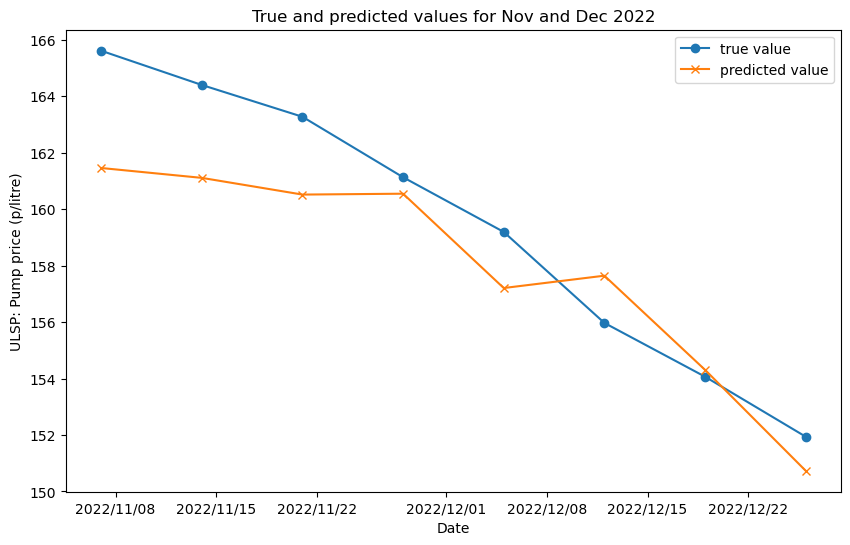

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

date_format = mdates.DateFormatter('%Y/%m/%d')
filtered_df = df2[(df2['DATE'] >= '2022-11-01') & (df2['DATE'] <= '2022-12-31')]
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['DATE'], filtered_df[' ULSP:  Pump price (p/litre)'], label='true value', marker='o')
plt.plot(filtered_df['DATE'], y_pred[-len(filtered_df):], label='predicted value', marker='x')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('Date')
plt.ylabel('ULSP: Pump price (p/litre)')
plt.title('True and predicted values for Nov and Dec 2022')
plt.legend()
plt.show()


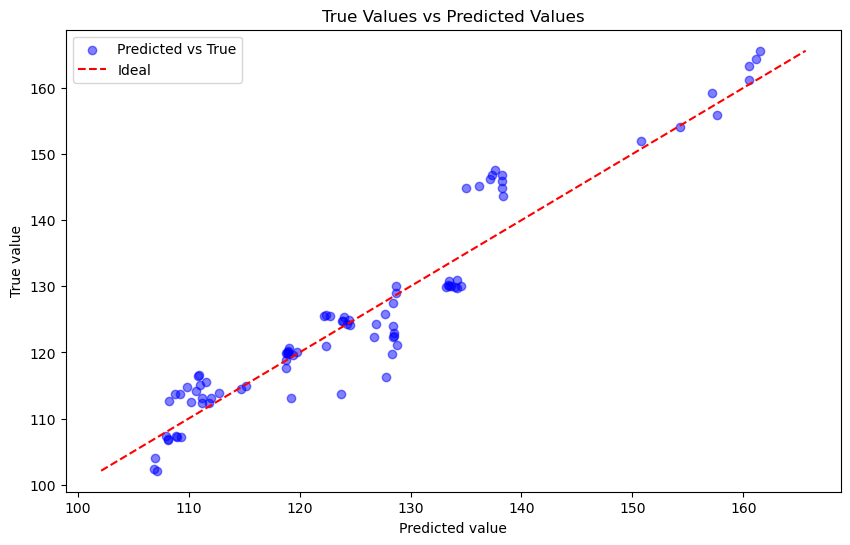

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, label='Predicted vs True', marker='o', color='blue',alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal')
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title('True Values vs Predicted Values')
plt.legend()
plt.show()

In [13]:
feature_importance = rf_model.feature_importances_
for feature, importance in zip(selected_features, feature_importance):
    print(f"{feature}: {importance}")

特征重要性：
Duty rate : 0.005336261990386474
VAT : 2.7153174617197528e-05
OPEC : 0.006624741577393573
OPEC1week: 0.05249897777537352
OPEC1month: 0.19205156166603632
CrudeOil: 0.0005951005761001071
CrudeOil1week: 0.000797357711581256
CrudeOil1month: 0.004219381895065598
BCrudeOil: 0.000391223595466827
BCrudeOil1week: 0.0008486780509828546
BCrudeOil1month: 0.006222056716191861
GDPUSD: 0.0054015196363564055
GDPEUR: 0.0016513660636517662
GDPCNY: 0.001359412968235019
GDPJPY: 0.0015680639730159286
Average  rainfall : 0.0012501981428920917
Average temperatures: 0.01592280861989868
Carbon budget: 0.0004394118708340232
Wind Sum: 0.012915140599584788
Solar Sum: 0.022044733594167396
gasprice: 0.015859122612107143
GDP Growth: 0.0003188190117568174
Inflation Rate: 0.4252876929488135
Unemployment Rate: 0.08843298035316728
Total annual registrations: 0.13793623487632356


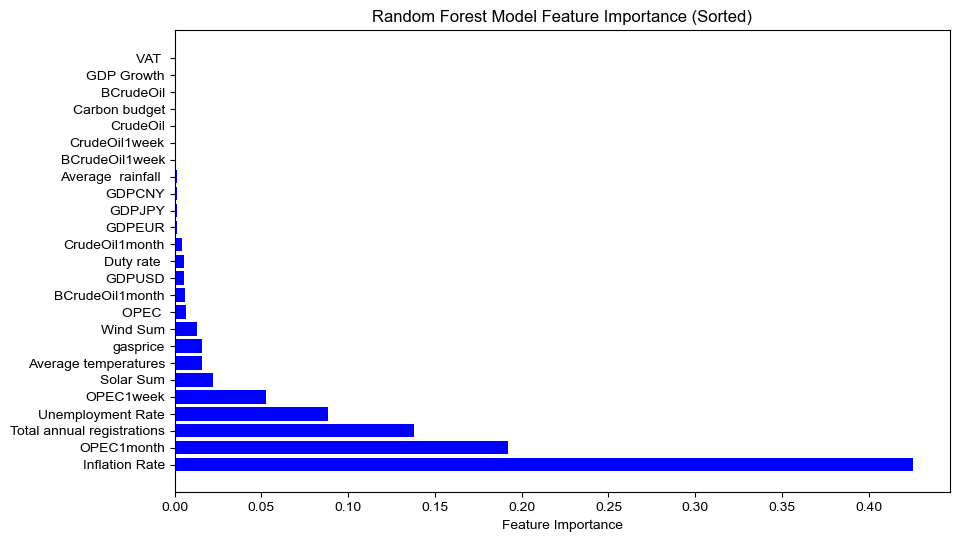

In [14]:
plt.rcParams['font.sans-serif'] = ['Arial']
sorted_indices = sorted(range(len(feature_importance)), key=lambda k: feature_importance[k], reverse=True)
sorted_features = [selected_features[i] for i in sorted_indices]
sorted_importance = [feature_importance[i] for i in sorted_indices]
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='blue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Model Feature Importance (Sorted)')
plt.show()

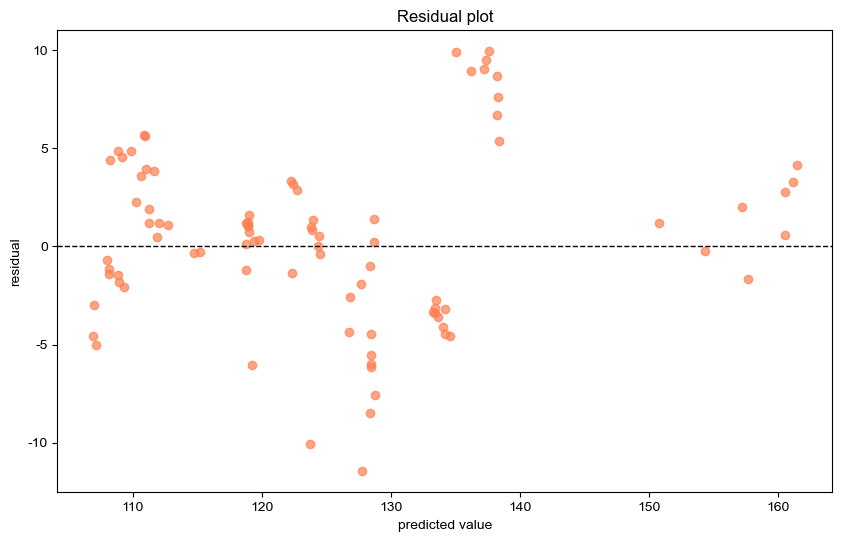

In [15]:
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['axes.unicode_minus']=False 
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='coral', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residual plot')
plt.show()

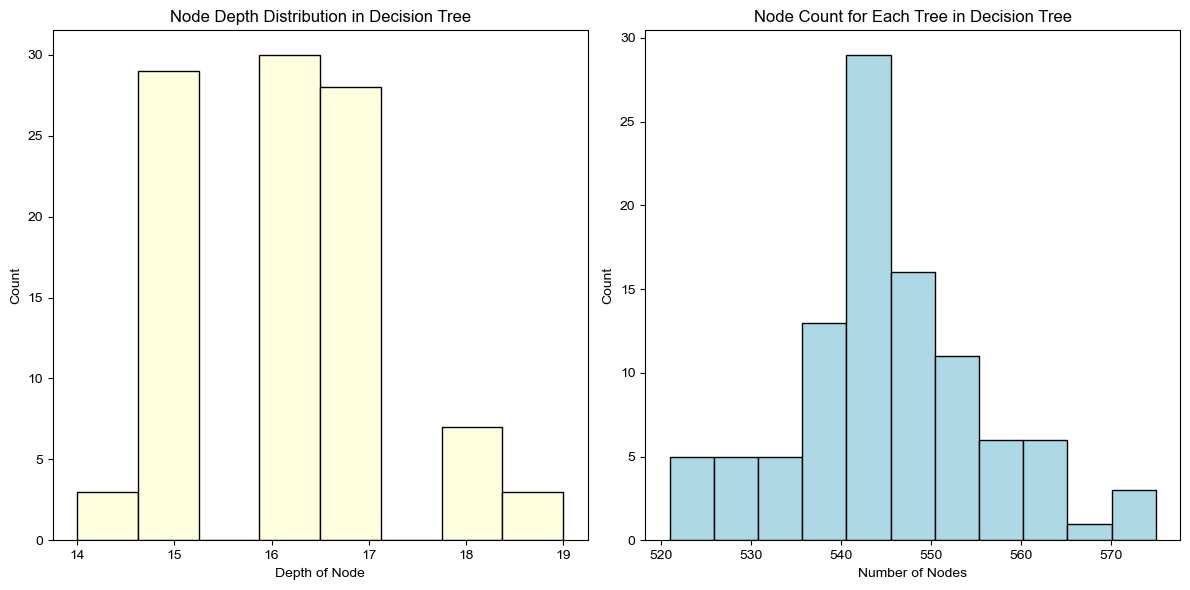

In [16]:
tree_depths = [estimator.tree_.max_depth for estimator in rf_model.estimators_]
tree_nodes = [estimator.tree_.node_count for estimator in rf_model.estimators_]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(tree_depths, bins='auto', color='lightyellow', edgecolor='black')
plt.xlabel('Depth of Node')
plt.ylabel('Count')
plt.title('Node Depth Distribution in Decision Tree')

plt.subplot(1, 2, 2)
plt.hist(tree_nodes, bins='auto', color='lightblue', edgecolor='black')
plt.xlabel('Number of Nodes')
plt.ylabel('Count')
plt.title('Node Count for Each Tree in Decision Tree')

plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fi

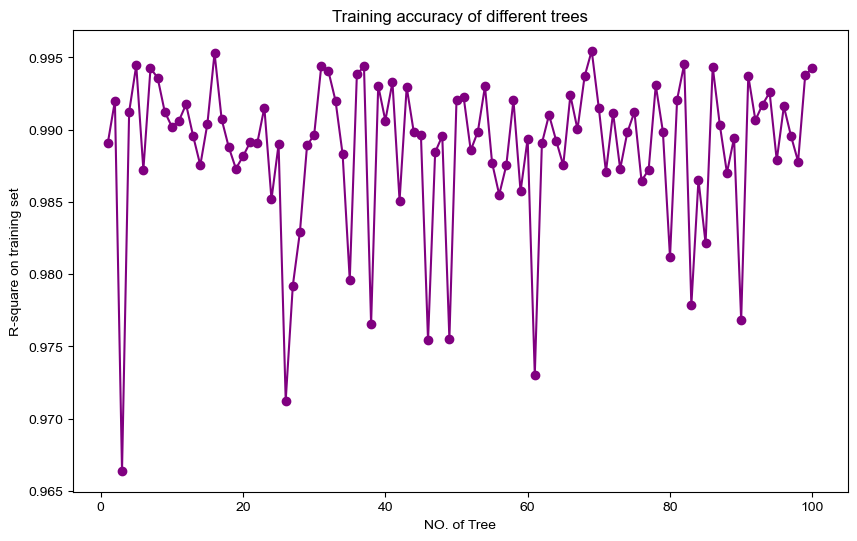

In [17]:
r2_train_per_tree = [r2_score(y_train, estimator.predict(X_train)) for estimator in rf_model.estimators_]
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_train_per_tree) + 1), r2_train_per_tree, marker='o', linestyle='-', color='purple')
plt.xlabel('NO. of Tree')
plt.ylabel('R-square on training set')
plt.title('Training accuracy of different trees')
plt.show()

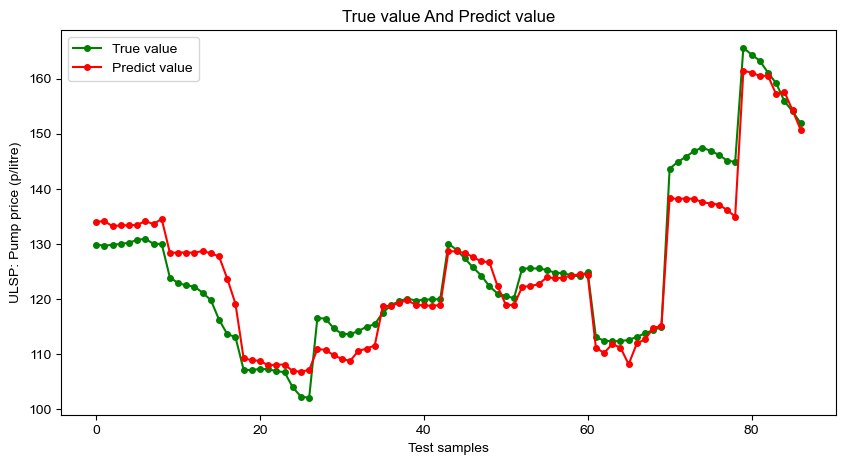

In [29]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(y_test[:100])), y_test[:100], "go-", label="True value", markersize=4)
plt.plot(np.arange(len(y_pred[:100])), y_pred[:100], "ro-", label="Predict value", markersize=4)
plt.title('True value And Predict value')
plt.xlabel('Test samples')
plt.ylabel('ULSP: Pump price (p/litre)')
plt.legend()
plt.show()